# Analysis on Airbnb NYC 2019 to find out key understandings

## Task and Goal
* Here, we are going to analyze and process the given dataset.
* The final goal is to come up with favorable information and strategy that will help to find out key understandings and behaviours 
 hosts and customers.
* So, initially, we aim at finding the internal connection among 'neighbourhood_group', 'room_type' and 'price' columns of the given dataset.

#### import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import f_oneway
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import kruskal
from scipy.stats import median_test
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#import pingouin as pg
#from scikit_posthocs import posthoc_dunn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
sns.set()

In [2]:
# import dataset
airbnb = pd.read_csv("Airbnb NYC 2019.csv")
print("The shape of the airbnb dataset:")
display(airbnb.shape)

The shape of the airbnb dataset:


(48895, 16)

In [3]:
print("The first five rows of the airbnb dataset:\n")
print(airbnb.head())

The first five rows of the airbnb dataset:

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  

In [4]:
# Check data types and missing values
print("Check data types and missing values of the dataset:\n")
airbnb.info()

Check data types and missing values of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 no

In [5]:
# To check the number of missing values in each column
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# To check the percentage of missing values for each column
missing_value_report = round((airbnb.isna().mean()*100),2).to_frame()
missing_value_report
missing_value_report = missing_value_report.rename(columns = {0: 'missing_values_%'})
print(missing_value_report.sort_values(by = 'missing_values_%', ascending = False))

                                missing_values_%
last_review                                20.56
reviews_per_month                          20.56
host_name                                   0.04
name                                        0.03
id                                          0.00
host_id                                     0.00
neighbourhood_group                         0.00
neighbourhood                               0.00
latitude                                    0.00
longitude                                   0.00
room_type                                   0.00
price                                       0.00
minimum_nights                              0.00
number_of_reviews                           0.00
calculated_host_listings_count              0.00
availability_365                            0.00


In [7]:
## drop missing values of the columns "host_name","name"
cleaned_airbnb = airbnb.dropna( subset=["name", "host_name"], axis = 0)

In [8]:
# convert "last_review" from object to datetime
cleaned_airbnb["last_review"] = pd.to_datetime(cleaned_airbnb["last_review"])

C:\Users\rajib\AppData\Local\Temp\ipykernel_8760\1109693263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_airbnb["last_review"] = pd.to_datetime(cleaned_airbnb["last_review"])


In [9]:
# impute missing values in "last_review" using ffill method

cleaned_airbnb = cleaned_airbnb.ffill()

In [10]:
# impute missing values for column "reviews_per_month"
cleaned_airbnb["reviews_per_month"]= cleaned_airbnb["reviews_per_month"].fillna(cleaned_airbnb["reviews_per_month"].mean())

In [11]:
cleaned_airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
cleaned_airbnb.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,0.38,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [13]:
cleaned_airbnb.shape

(48858, 16)

In [14]:
## Create New DataFrame

airbnb_df = cleaned_airbnb.copy()

In [15]:
# change data types "neighbourhood_group" from object to category
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].astype('category')

## change data types "room_type" from object to category
airbnb_df["room_type"] = airbnb_df["room_type"].astype('category')

In [16]:
airbnb_df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [17]:
# convert all the column names from capital letter to small letter

for column in ['name','host_name', 'neighbourhood_group','neighbourhood','room_type']:

    airbnb_df[column] = airbnb_df[column].str.lower()

## Data Visualization to check data distribuition and about outliers

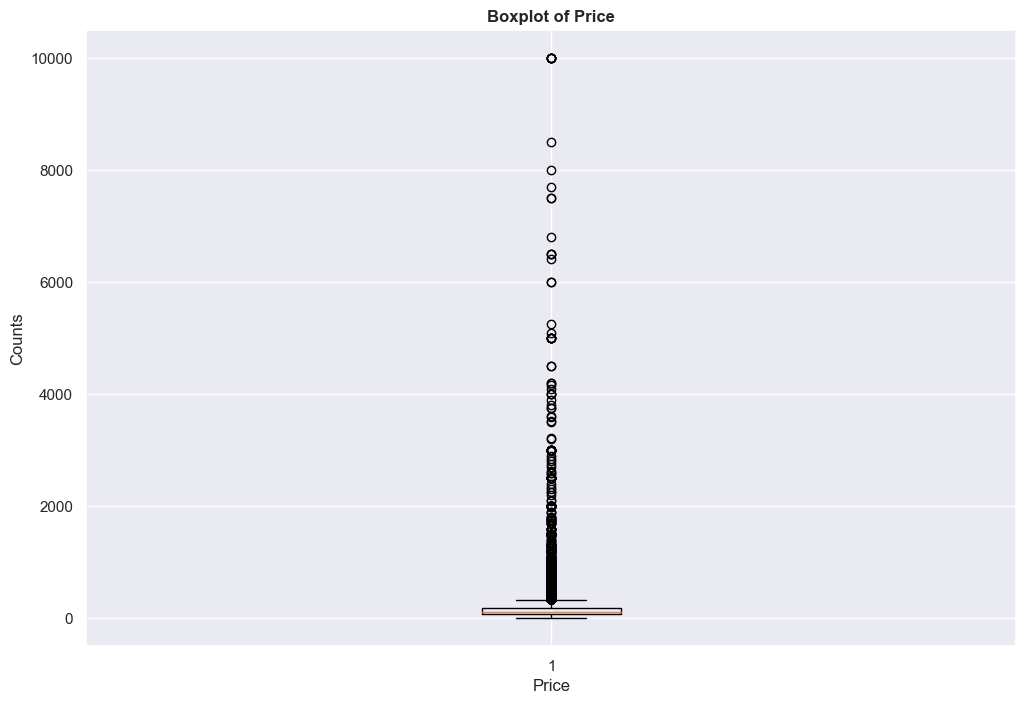

In [18]:
plt.figure(figsize = (12,8))
plt.boxplot(airbnb_df["price"])
plt.xlabel("Price")
plt.ylabel('Counts')
plt.title('Boxplot of Price', weight = 'bold')
plt.show()

* Too much outliers, we can see in the boxplot

In [19]:
# checking outliers for the column "price"
q1_price = airbnb_df["price"].quantile(0.25)
q3_price = airbnb_df["price"].quantile(0.75)
IQR_price = q3_price-q1_price
IQR_price

106.0

In [20]:
lower_bound_price = q1_price - 1.5*IQR_price
print("Lower Bound for price column outliers range", lower_bound_price)

upper_bound_price = q3_price + 1.5*IQR_price
print("Upper Bound for price column outliers range", upper_bound_price)

Lower Bound for price column outliers range -90.0
Upper Bound for price column outliers range 334.0


In [21]:
airbnb_df = airbnb_df[(airbnb_df["price"] >= lower_bound_price) & (airbnb_df["price"] <= upper_bound_price)]

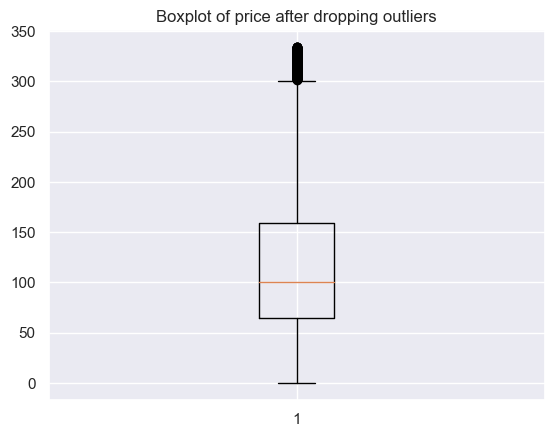

In [22]:
# Create boxplot after dropping outliers
plt.boxplot(airbnb_df["price"])
plt.title("Boxplot of price after dropping outliers")
plt.show()

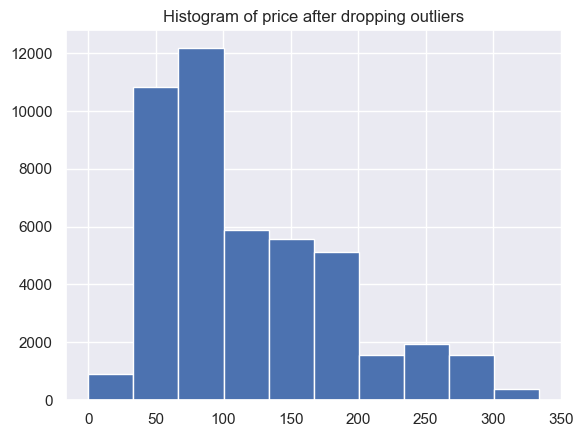

In [23]:
#Create histogram after dropping outliers
plt.hist(airbnb_df["price"])
plt.title("Histogram of price after dropping outliers")
plt.show()

* The price columns has right skewness, not symmetrically distributed.

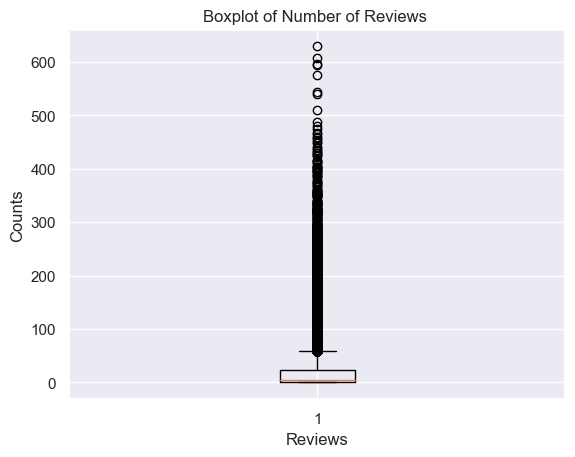

In [24]:
# Create boxplot to check outliers
plt.boxplot(airbnb_df["number_of_reviews"])
plt.title("Boxplot of Number of Reviews ")
plt.xlabel('Reviews')
plt.ylabel('Counts')
plt.show()

In [25]:
# finding outliers for 'number_of_reviews'
q1_num_review = airbnb_df["number_of_reviews"].quantile(0.25)
q3_num_review = airbnb_df["number_of_reviews"].quantile(0.75)
IQR_num_review = q3_num_review - q1_num_review 

lower_num_review = q1_num_review -1.5*IQR_num_review
print("The lower bound for number of reviews is",lower_num_review)

upper_num_review = q3_num_review + 1.5*IQR_num_review

print("The upper bound for number of reviews is",upper_num_review)

The lower bound for number of reviews is -33.5
The upper bound for number of reviews is 58.5


In [26]:
airbnb_df = airbnb_df[(airbnb_df["number_of_reviews"] > lower_num_review) & (airbnb_df["number_of_reviews"] < upper_num_review)]

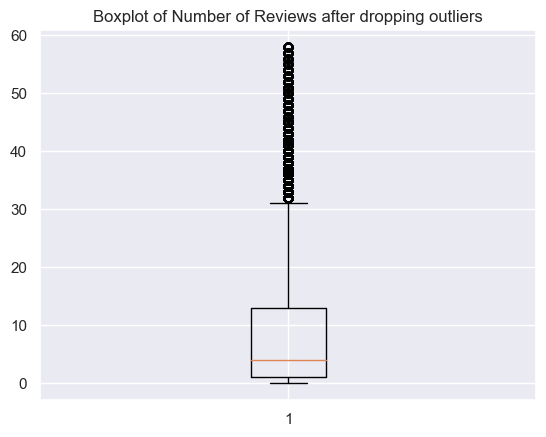

In [27]:
# Create boxplot after dropping outliers
plt.boxplot(airbnb_df["number_of_reviews"])
plt.title("Boxplot of Number of Reviews after dropping outliers")
plt.show()

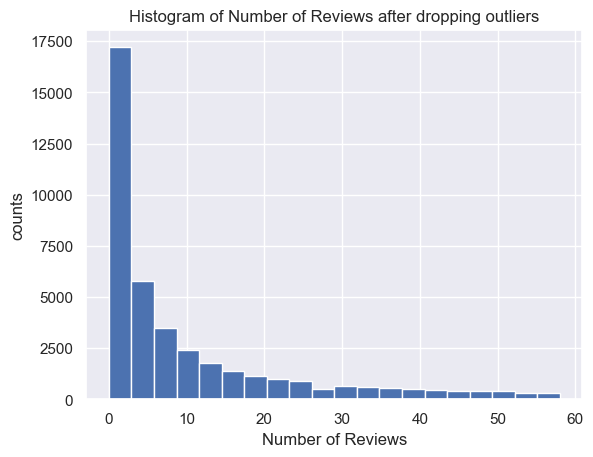

In [28]:
#Create histogram after dropping outliers
plt.hist(airbnb_df["number_of_reviews"], bins = 20)
plt.title("Histogram of Number of Reviews after dropping outliers")
plt.xlabel('Number of Reviews')
plt.ylabel('counts')
plt.show()

* The Number of Reviews has right skewness.

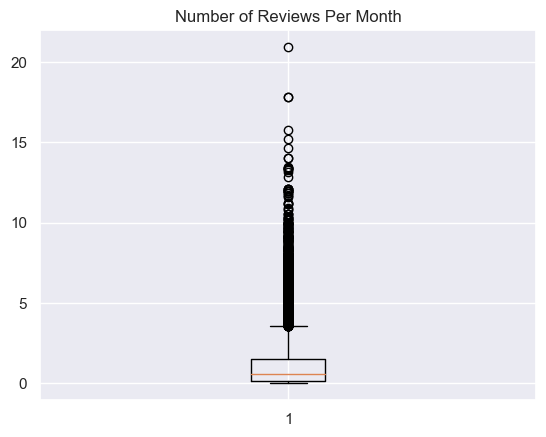

In [29]:
# Boxplot of Reviews Per Month 
plt.boxplot(airbnb_df["reviews_per_month"])
plt.title("Number of Reviews Per Month")
plt.show()

In [30]:
# finding outliers for 'number_of_reviews'
q1_num_review_per_month = airbnb_df["reviews_per_month"].quantile(0.25)
q3_num_review_per_month = airbnb_df["reviews_per_month"].quantile(0.75)
IQR_num_review_per_month = q3_num_review_per_month - q1_num_review_per_month

lower_num_review_per_month = q1_num_review_per_month -1.5*IQR_num_review_per_month
print("The lower bound for reviews per month is",lower_num_review_per_month)

upper_num_review_per_month = q3_num_review_per_month + 1.5*IQR_num_review_per_month

print("The upper bound for reviews per month is",upper_num_review_per_month)

The lower bound for reviews per month is -1.8950000000000002
The upper bound for reviews per month is 3.585


In [31]:
airbnb_df = airbnb_df[(airbnb_df["reviews_per_month"] > lower_num_review_per_month) & (airbnb_df["reviews_per_month"] < upper_num_review_per_month)]

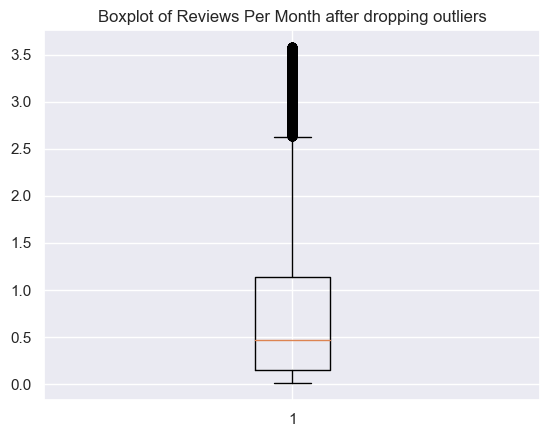

In [32]:
# Create boxplot after dropping outliers
plt.boxplot(airbnb_df["reviews_per_month"])
plt.title("Boxplot of Reviews Per Month after dropping outliers")
plt.show()

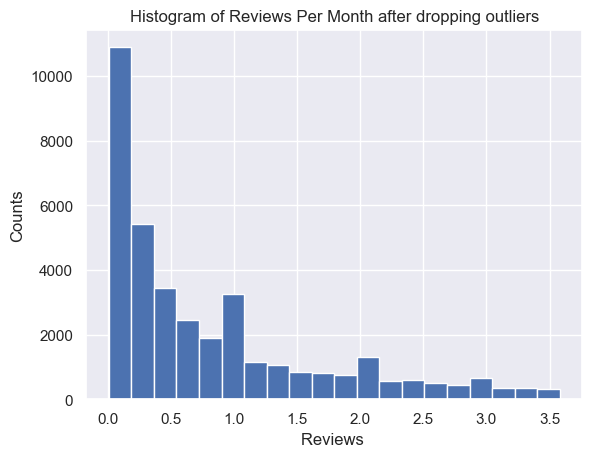

In [33]:
#Create histogram after dropping outliers
plt.hist(airbnb_df["reviews_per_month"], bins = 20)
plt.title("Histogram of Reviews Per Month after dropping outliers")
plt.xlabel('Reviews ')
plt.ylabel('Counts')
plt.show()

In [34]:
airbnb_df.shape

(37054, 16)

## Exploratory Data Analysis (EDA)

In [35]:
# Descriptive Summary only for numerical values
airbnb_df.describe(include = [np.number])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.705400e+04,3.705400e+04,37054.000000,37054.000000,37054.000000,37054.000000,37054.000000,37054.000000,37054.000000,37054.000000
mean,1.930376e+07,6.543057e+07,40.728634,-73.952222,120.360042,7.638393,9.334107,0.817021,7.001376,98.549603
std,1.067176e+07,7.683309e+07,0.055022,0.044760,68.518068,21.567851,12.923809,0.864909,31.684005,130.006470
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.880178e+06,7.913302e+06,40.690180,-73.982160,65.000000,2.000000,1.000000,0.150000,1.000000,0.000000
50%,2.003068e+07,2.994373e+07,40.722035,-73.955150,100.000000,3.000000,3.000000,0.470000,1.000000,15.000000
75%,2.893634e+07,1.037242e+08,40.763230,-73.936553,160.000000,5.000000,12.000000,1.140000,2.000000,183.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,1250.000000,58.000000,3.580000,327.000000,365.000000


In [36]:
# for categorical data
# To find the number of different neighbourhood_group
type_neighbourhood_group = airbnb_df["neighbourhood_group"].value_counts()
type_neighbourhood_group = type_neighbourhood_group.reset_index()
type_neighbourhood_group.columns=['neighbourhood_group','counts']
type_neighbourhood_group

,neighbourhood_group,counts
0,manhattan,16019
1,brooklyn,15747
2,queens,4214
3,bronx,806
4,staten island,268


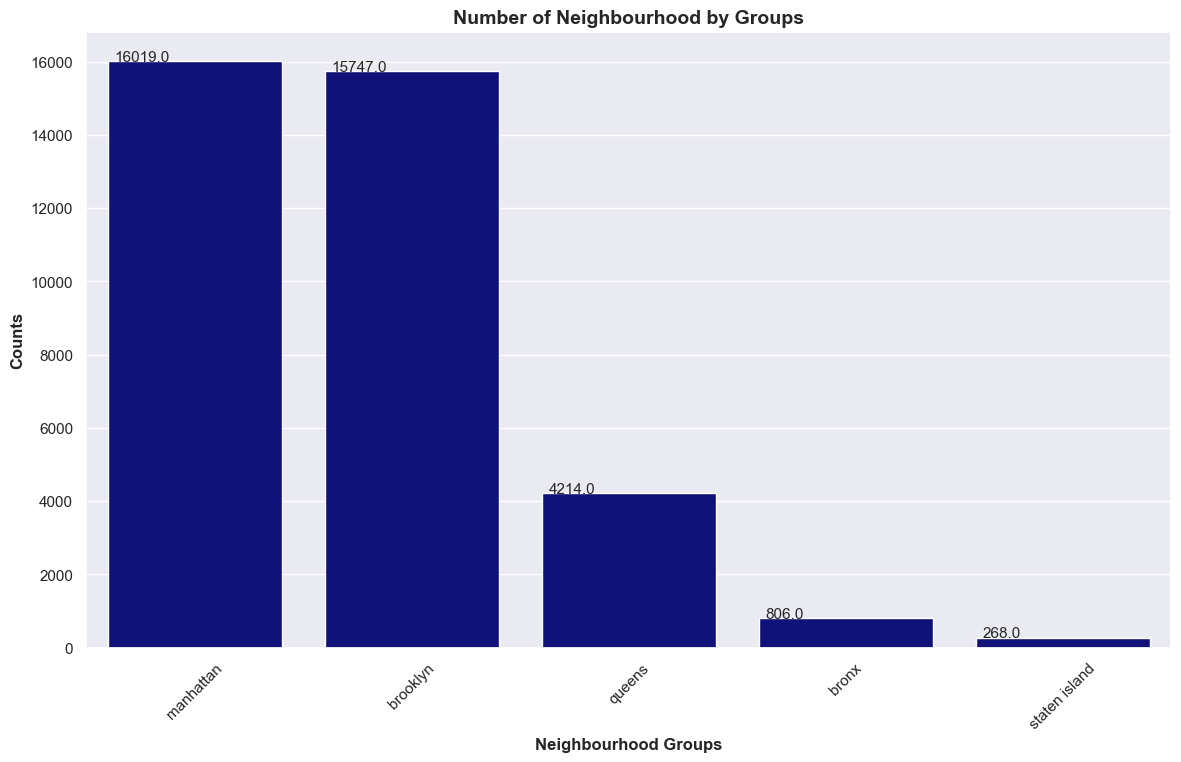

In [37]:
plt.figure(figsize =(14,8))
ax = sns.barplot(x ="neighbourhood_group",y="counts",data =type_neighbourhood_group, color = "darkblue")
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood Groups', weight = 'bold')
plt.ylabel("Counts", weight = 'bold')
plt.title("Number of Neighbourhood by Groups", fontsize =14, weight ='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

In [38]:
# To find the number of different neighbourhood_group
type_neighbourhood_group_perc = airbnb_df["neighbourhood_group"].value_counts(normalize= True)*100
type_neighbourhood_group_perc = type_neighbourhood_group_perc.reset_index()
type_neighbourhood_group_perc.columns=['neighbourhood_group','counts']
type_neighbourhood_group_perc

,neighbourhood_group,counts
0,manhattan,43.231500
1,brooklyn,42.497436
2,queens,11.372591
3,bronx,2.175204
4,staten island,0.723269


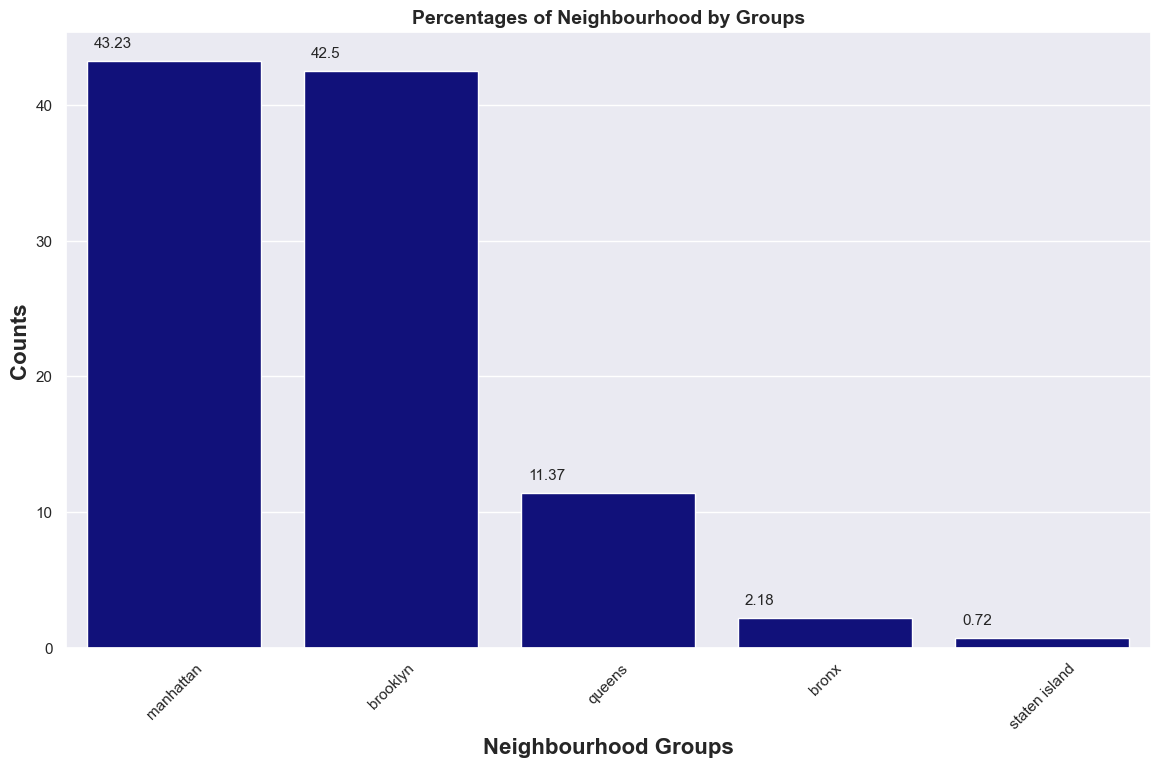

In [39]:
plt.figure(figsize =(14,8))
ax = sns.barplot(x ="neighbourhood_group",y="counts",data =type_neighbourhood_group_perc, color = "darkblue")
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood Groups', fontsize = 16, weight = 'bold')
plt.ylabel("Counts", weight = 'bold', fontsize = 16)
plt.title("Percentages of Neighbourhood by Groups", fontsize =14, weight ='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

In [40]:
# investigating the room_type object
room_type_df = airbnb_df["room_type"].value_counts()
room_type_df = room_type_df.reset_index()
room_type_df.columns =['room_type', 'counts']
room_type_df

,room_type,counts
0,entire home/apt,18412
1,private room,17677
2,shared room,965


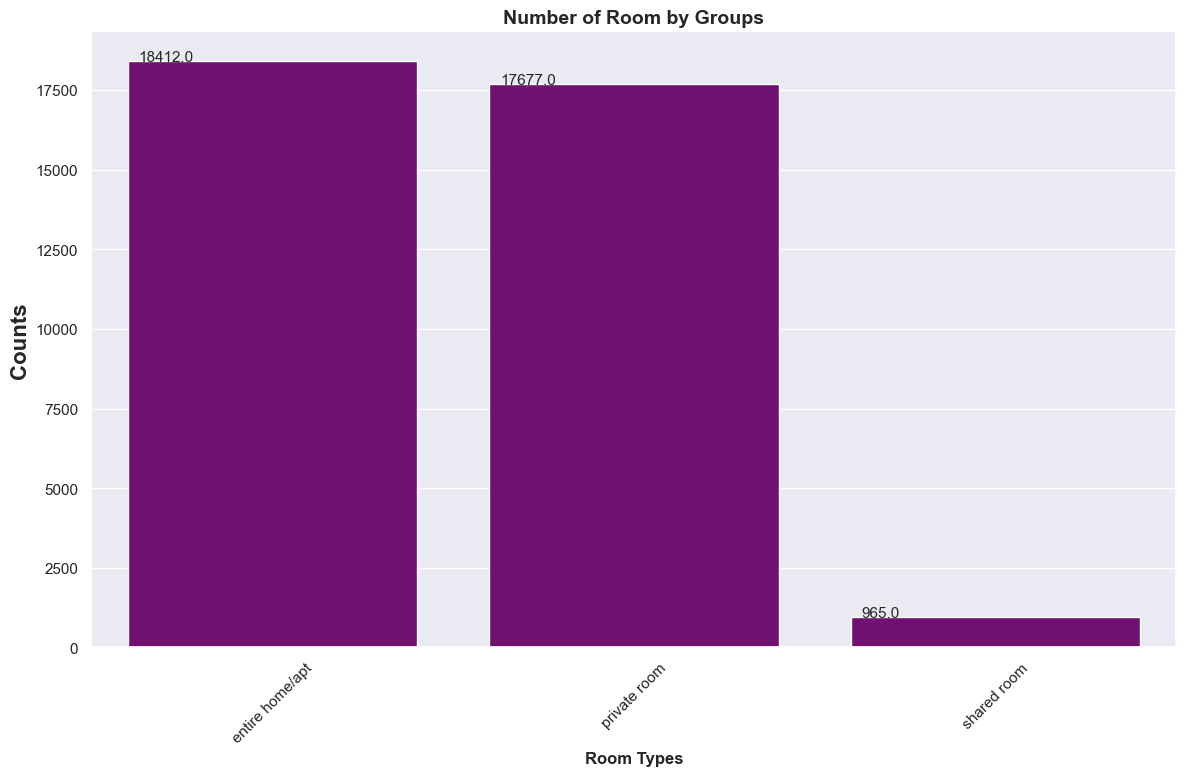

In [41]:
plt.figure(figsize =(14,8))
ax = sns.barplot(x ="room_type",y="counts",data =room_type_df, color = "purple")
plt.xticks(rotation=45)
plt.xlabel('Room Types', weight ='bold')
plt.ylabel("Counts", fontsize = 16, weight ='bold')
plt.title("Number of Room by Groups", fontsize =14, weight ='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

In [42]:
# investigating the room_type object
room_type_df_perc = airbnb_df["room_type"].value_counts(normalize = True)*100
room_type_df_perc = room_type_df_perc.reset_index()
room_type_df_perc.columns =['room_type', 'counts']
room_type_df_perc

,room_type,counts
0,entire home/apt,49.689642
1,private room,47.706051
2,shared room,2.604307


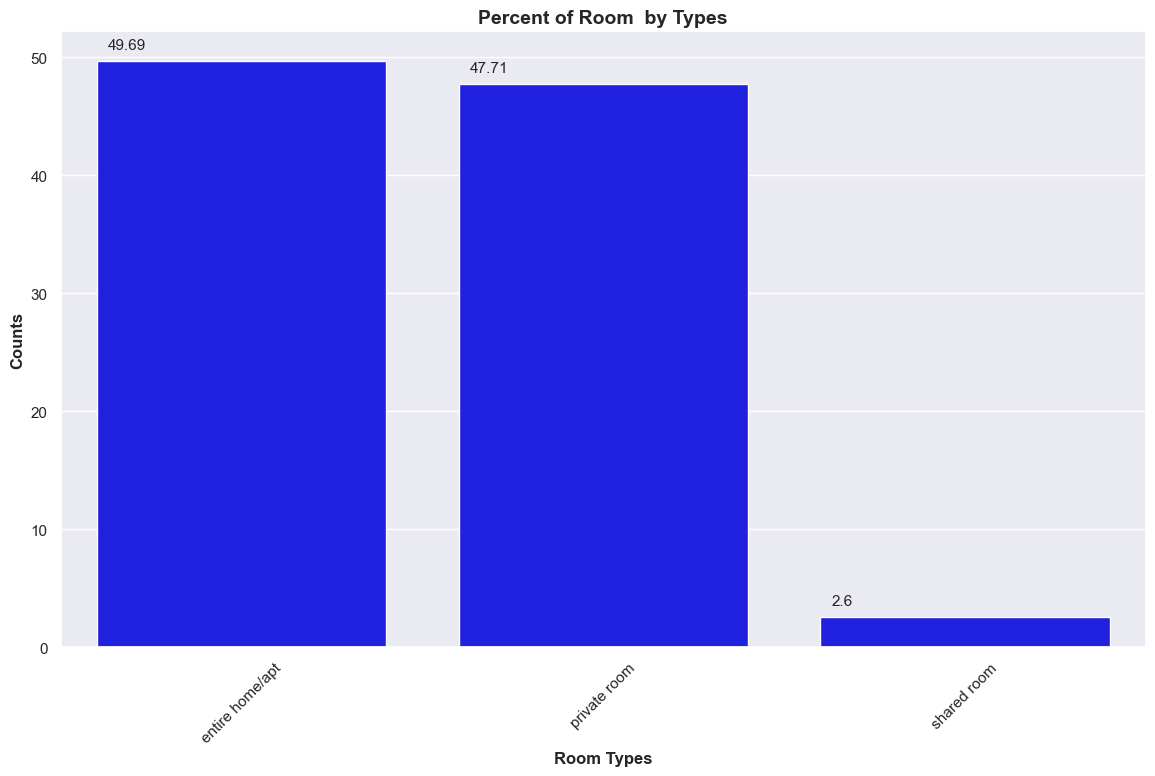

In [43]:
plt.figure(figsize =(14,8))
ax = sns.barplot(x ="room_type",y="counts",data =room_type_df_perc, color = "blue")
plt.xticks(rotation=45)
plt.xlabel('Room Types', weight ='bold')
plt.ylabel("Counts", weight ='bold')
plt.title("Percent of Room  by Types", fontsize =14, weight ='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

* Visualize geographical data using scatter plots (latitude vs. longitude) to observe the spatial distribution of listings.

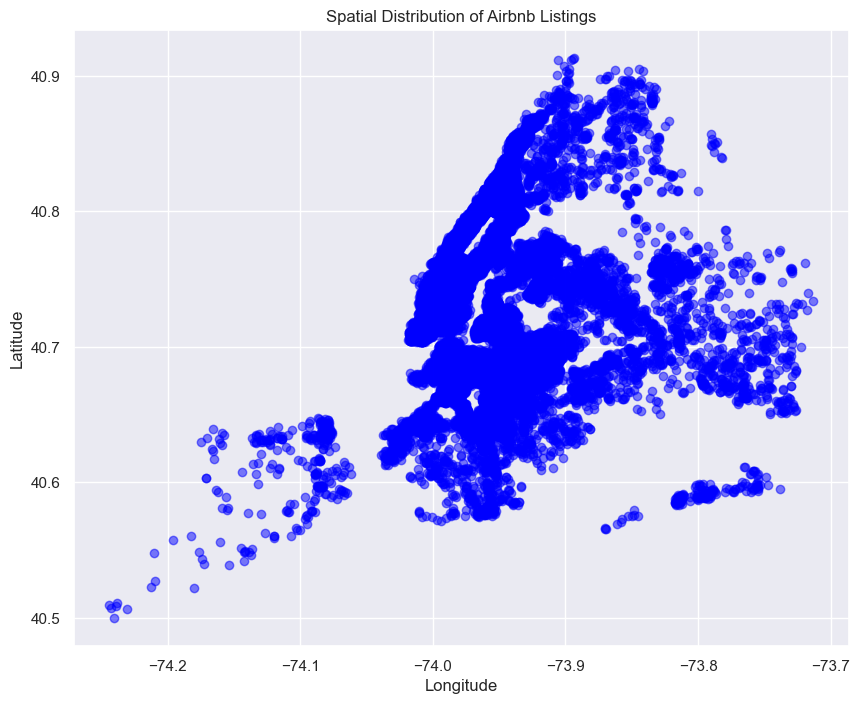

In [44]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(airbnb_df['longitude'], airbnb_df['latitude'], alpha=0.5, color='blue')  # Adjust alpha for transparency
plt.title('Spatial Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

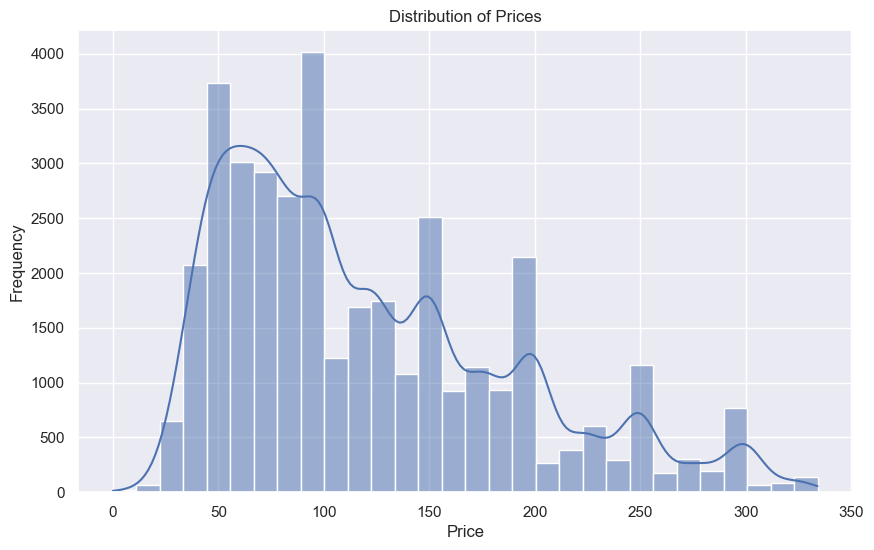

In [45]:
# Plot histogram for 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data=airbnb_df, x='price', bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

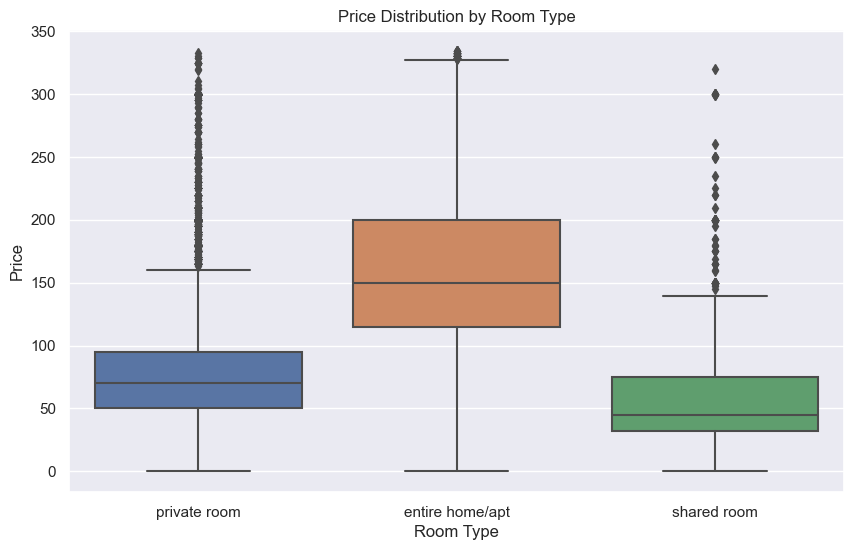

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_df, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

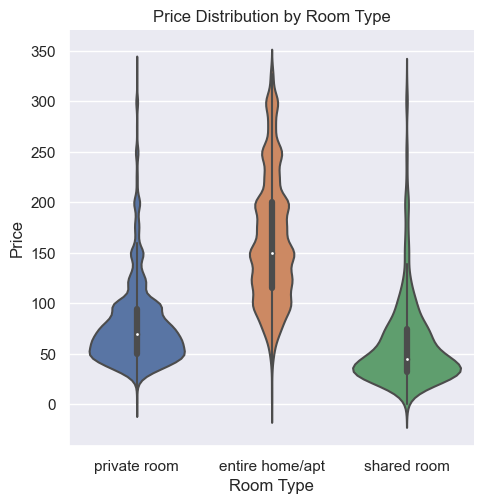

In [47]:
plt.figure(figsize=(10, 6))
sns.catplot(data=airbnb_df, x='room_type', y='price', kind = 'violin')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

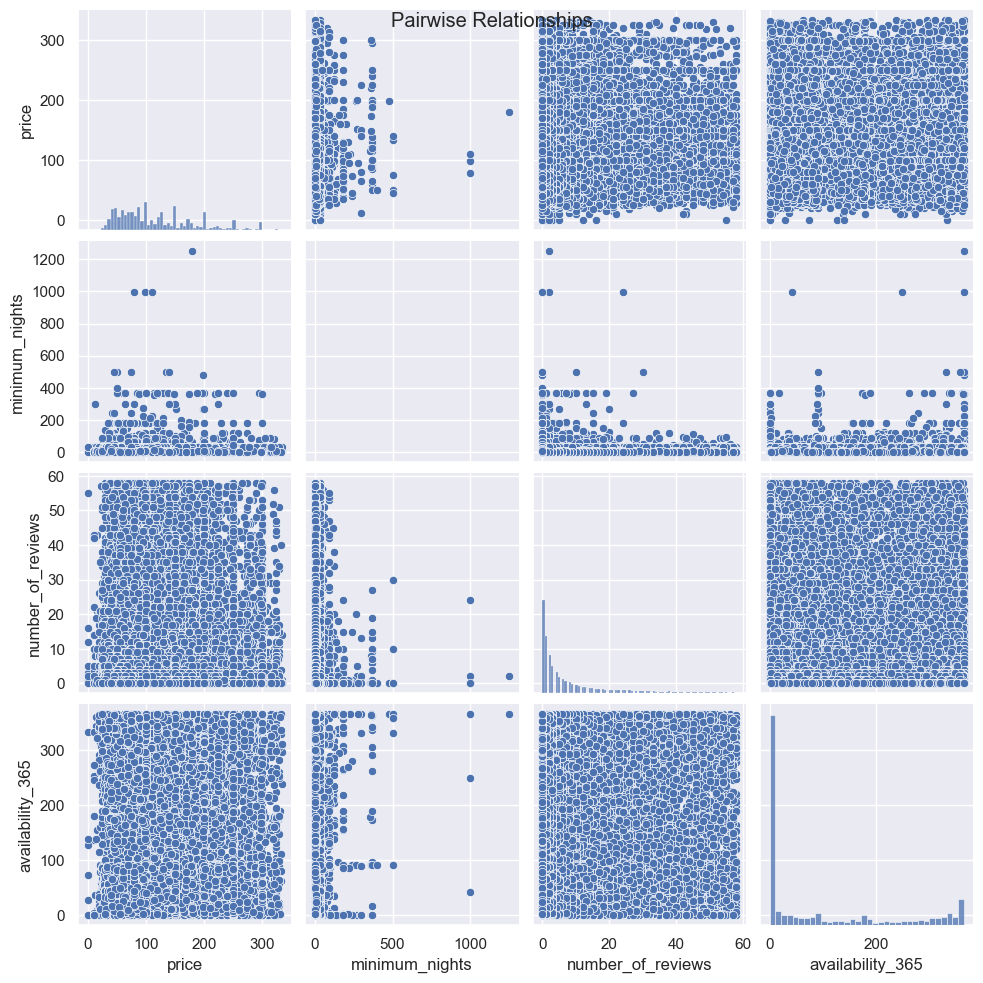

In [48]:
sns.pairplot(airbnb_df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']])
plt.suptitle('Pairwise Relationships')
plt.show()

# To find relationships among numerical features

In [49]:
correlation_matrix = airbnb_df[["price","minimum_nights","number_of_reviews","calculated_host_listings_count",
                                "availability_365"]].corr(method = 'pearson')
correlation_matrix

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.027444,-0.022176,0.184069,0.060841
minimum_nights,0.027444,1.000000,-0.071899,0.122775,0.174631
number_of_reviews,-0.022176,-0.071899,1.000000,-0.084182,0.132739
calculated_host_listings_count,0.184069,0.122775,-0.084182,1.000000,0.251410
availability_365,0.060841,0.174631,0.132739,0.251410,1.000000


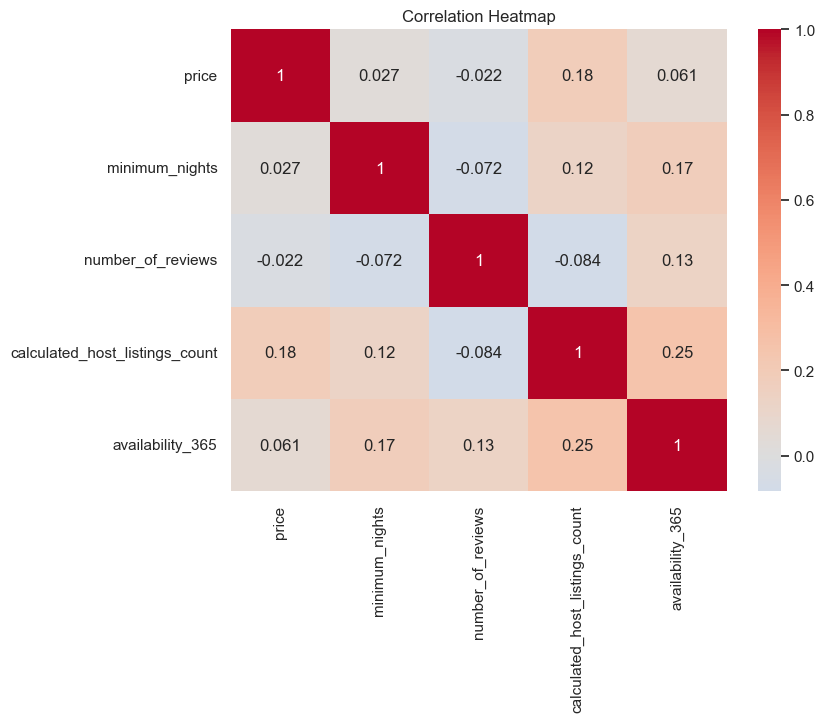

In [50]:
plt.figure(figsize=(8, 6))  # Set figure size (optional)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')  # Add title
plt.show()

### Grouping and aggregation

In [51]:

# Group data by neighborhood and calculate summary statistics
neighborhood_stats = airbnb_df.groupby('neighbourhood')['price', 'minimum_nights', 'reviews_per_month'].mean().reset_index()

# Group data by neighborhood group and calculate summary statistics
neighborhood_group_stats = airbnb_df.groupby('neighbourhood_group')['price', 'minimum_nights', 'reviews_per_month'].mean().reset_index()

print("Neighborhood Statistics:")
print(neighborhood_stats)

print("\nNeighborhood Group Statistics:")
print(neighborhood_group_stats)

Neighborhood Statistics:
       neighbourhood       price  minimum_nights  reviews_per_month
0           allerton   83.580645        2.354839           1.408710
1      arden heights   67.250000        9.500000           1.040000
2           arrochar   86.315789        2.736842           0.985789
3            arverne  138.754717        1.679245           1.316038
4            astoria   96.667118        6.083897           0.819729
..               ...         ...             ...                ...
211      willowbrook  249.000000        4.000000           0.800000
212  windsor terrace  131.250000       10.474138           0.638879
213        woodhaven   71.193548        3.000000           1.412742
214         woodlawn   69.428571        1.571429           0.730000
215         woodside   72.885870       11.755435           1.084022

[216 rows x 4 columns]

Neighborhood Group Statistics:
  neighbourhood_group       price  minimum_nights  reviews_per_month
0               bronx   76.299007 

C:\Users\rajib\AppData\Local\Temp\ipykernel_8760\1931504757.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  neighborhood_stats = airbnb_df.groupby('neighbourhood')['price', 'minimum_nights', 'reviews_per_month'].mean().reset_index()
C:\Users\rajib\AppData\Local\Temp\ipykernel_8760\1931504757.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  neighborhood_group_stats = airbnb_df.groupby('neighbourhood_group')['price', 'minimum_nights', 'reviews_per_month'].mean().reset_index()


In [52]:
# Group data by room type and calculate summary statistics
room_type_stats = airbnb_df.groupby('room_type')['price', 'minimum_nights', 'reviews_per_month'].mean().reset_index()

print("\nRoom Type Statistics:")
print(room_type_stats)


Room Type Statistics:
         room_type       price  minimum_nights  reviews_per_month
0  entire home/apt  163.196774        9.435042           0.792049
1     private room   79.030435        5.797024           0.832815
2      shared room   60.125389        7.089119           1.004166


C:\Users\rajib\AppData\Local\Temp\ipykernel_8760\3001586240.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  room_type_stats = airbnb_df.groupby('room_type')['price', 'minimum_nights', 'reviews_per_month'].mean().reset_index()


In [53]:
# Group data by neighborhood group and room type, and calculate summary statistics
grouped_stats = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['price', 'minimum_nights', 'reviews_per_month'].agg(['mean', 'median', 'std']).reset_index()

print("Grouped Statistics by Neighborhood Group and Room Type:")
print(grouped_stats)

Grouped Statistics by Neighborhood Group and Room Type:
   neighbourhood_group        room_type       price                    \
                                               mean median        std   
0                bronx  entire home/apt  113.212245  100.0  53.224662   
1                bronx     private room   61.591716   55.0  33.922502   
2                bronx      shared room   46.907407   40.0  29.277636   
3             brooklyn  entire home/apt  148.596231  140.0  58.999418   
4             brooklyn     private room   70.272651   63.0  33.484774   
5             brooklyn      shared room   48.338798   36.0  38.752110   
6            manhattan  entire home/apt  180.116884  175.0  61.797144   
7            manhattan     private room   98.008216   88.0  49.665027   
8            manhattan      shared room   79.355978   69.0  49.074774   
9               queens  entire home/apt  133.885367  120.0  57.844156   
10              queens     private room   66.913706   60.0  32.13044

C:\Users\rajib\AppData\Local\Temp\ipykernel_8760\3187896432.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_stats = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['price', 'minimum_nights', 'reviews_per_month'].agg(['mean', 'median', 'std']).reset_index()


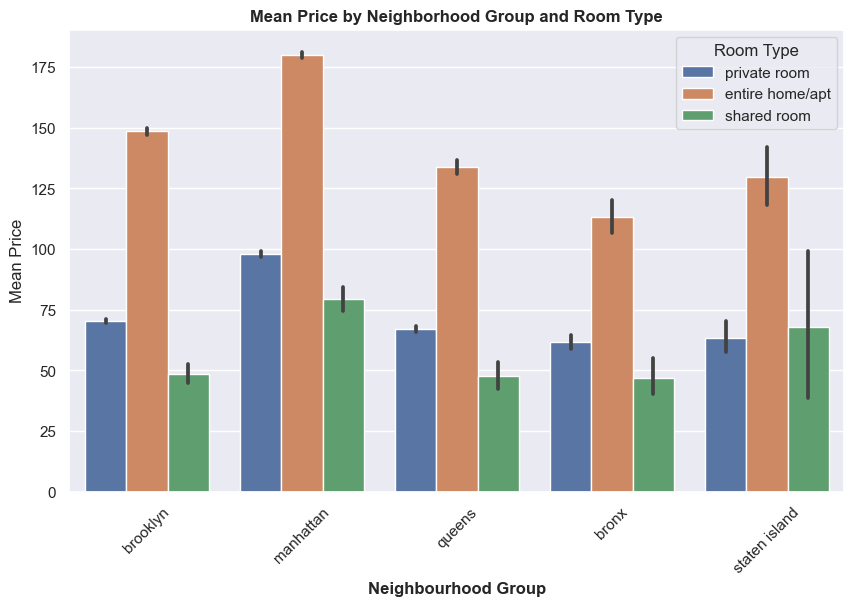

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=airbnb_df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Mean Price by Neighborhood Group and Room Type', weight = 'bold')
plt.xlabel('Neighbourhood Group', weight = 'bold')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

In [55]:
# Group Airbnb data by neighborhood group and room type and calculate mean price
grouped_data = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

grouped_data

,neighbourhood_group,room_type,price
0,bronx,entire home/apt,113.212245
1,bronx,private room,61.591716
2,bronx,shared room,46.907407
3,brooklyn,entire home/apt,148.596231
4,brooklyn,private room,70.272651
5,brooklyn,shared room,48.338798
6,manhattan,entire home/apt,180.116884
7,manhattan,private room,98.008216
8,manhattan,shared room,79.355978
9,queens,entire home/apt,133.885367


## Hypothesis Test

C:\Users\rajib\anaconda3\envs\snakes\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test p-value: 0.0


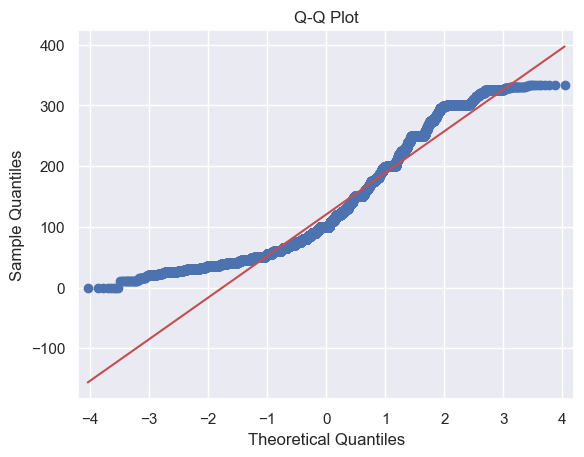

In [56]:
# Before doing One-way-anova test , we have to check normality or Homogeneity of Variances test. We will do normality test here.
# Example for Shapiro-Wilk test
data = airbnb_df['price']

# Shapiro-Wilk test for normality
stat, p_value = shapiro(data)
print("Shapiro-Wilk Test p-value:", p_value)

# Q-Q plot
sm.qqplot(data, line='s')
plt.title("Q-Q Plot")
plt.show()

* p-value is 0 < 0.05 . So data distribution is not normal , We will do alternative Kruskal wallis Test.


### The Kruskal-Wallis test is a non-parametric alternative to one-way ANOVA when the assumption of normality is violated. 


* Null Hypothesis (H0): There is no significant difference in the medians of the groups.
* Alternative Hypothesis (Ha): At least one group's median is different from the others.

In [57]:
for group in grouped_stats['neighbourhood_group'].unique():
    data = airbnb_df[airbnb_df['neighbourhood_group'] == group]['price']
    print(f"Neighbourhood Group: {group}")
    print("Median Price:", np.median(data))
    print("Kruskal-Wallis p-value:", kruskal(*data).pvalue)
    print("="*40)

Neighbourhood Group: bronx
Median Price: 65.0
Kruskal-Wallis p-value: 0.4933715523624466
Neighbourhood Group: brooklyn
Median Price: 88.0
Kruskal-Wallis p-value: 0.4985012852148101
Neighbourhood Group: manhattan
Median Price: 138.0
Kruskal-Wallis p-value: 0.49851406447597146
Neighbourhood Group: queens
Median Price: 75.0
Kruskal-Wallis p-value: 0.49710259487792674
Neighbourhood Group: staten island
Median Price: 75.0
Kruskal-Wallis p-value: 0.48849024846769573


* p-value > 0.05: Fail to reject the null hypothesis.
* There is insufficient evidence to conclude that there are significant differences in medians among the groups.

### Explore trends over time by analyzing variables like reviews per month, availability, and price

C:\Users\rajib\AppData\Local\Temp\ipykernel_8760\1475580822.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = airbnb_df.resample('M', on='last_review').mean()


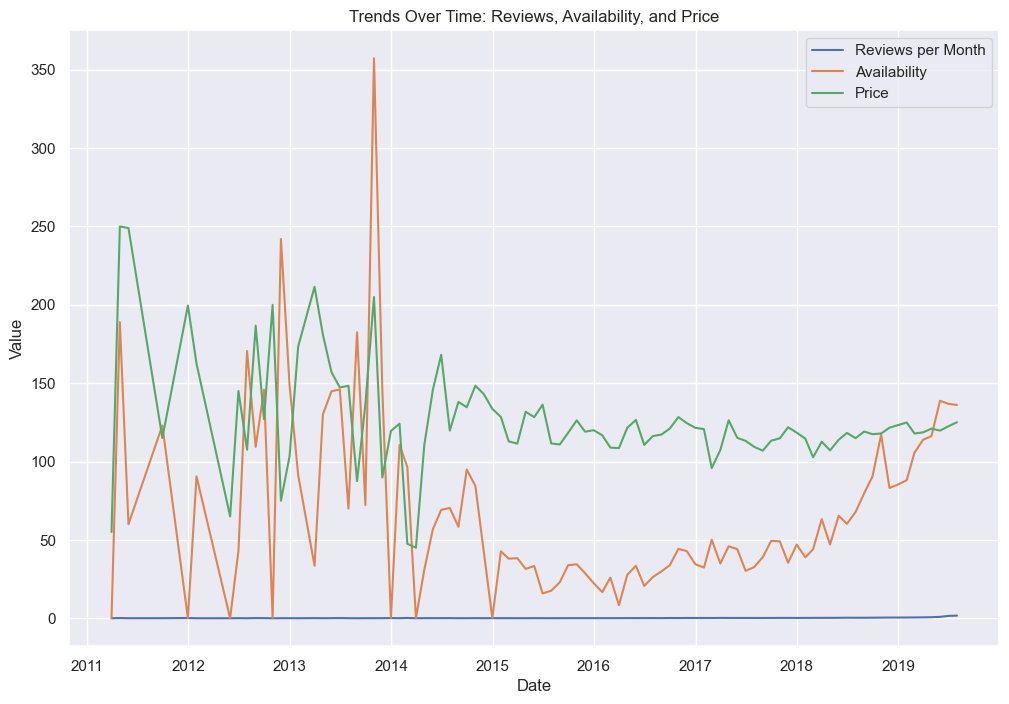

In [58]:
# Group by month and calculate mean values
monthly_data = airbnb_df.resample('M', on='last_review').mean()

# Plot trends over time

# Set a colorblind-friendly palette
color_palette = sns.color_palette("colorblind") 

plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_data, x='last_review', y='reviews_per_month', label='Reviews per Month')
sns.lineplot(data=monthly_data, x='last_review', y='availability_365',label='Availability')
sns.lineplot(data=monthly_data, x='last_review', y='price', label='Price')
plt.title('Trends Over Time: Reviews, Availability, and Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

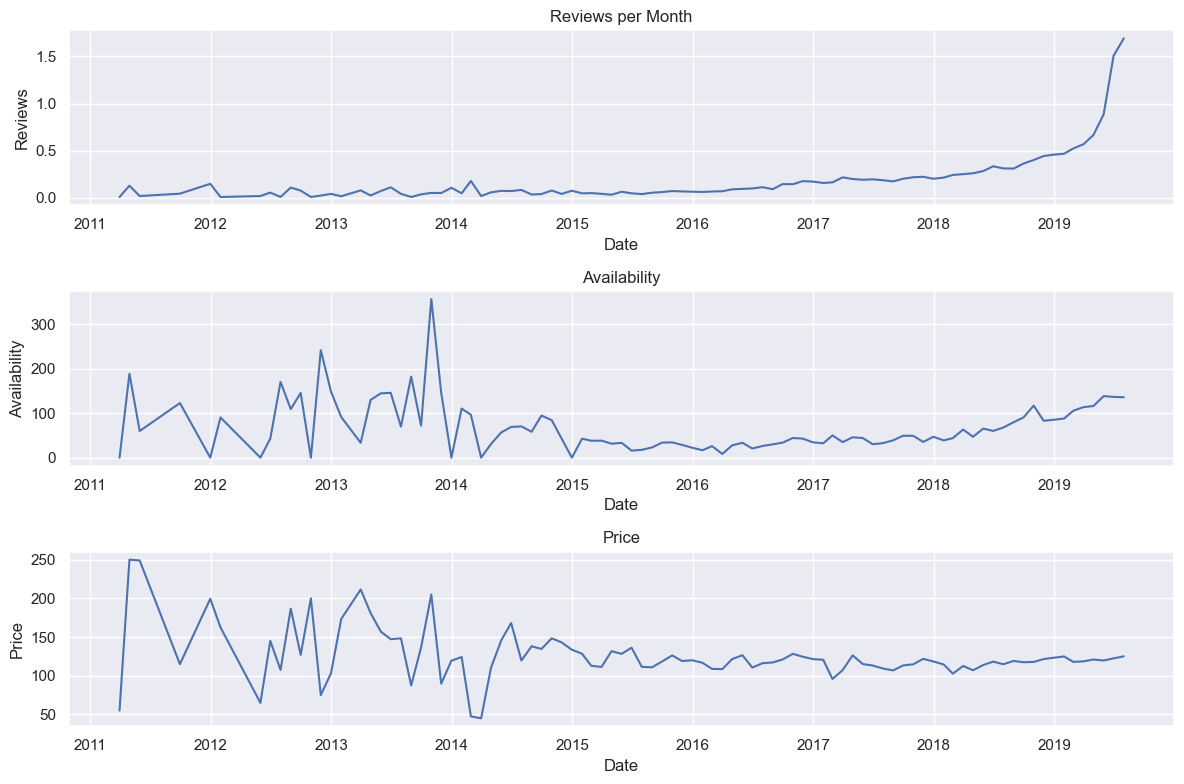

In [59]:
# Set a colorblind-friendly palette
color_palette = sns.color_palette("colorblind")

# Plot time series line plots
plt.figure(figsize=(12, 8))

# Reviews per Month
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_data, x='last_review', y='reviews_per_month')
plt.title('Reviews per Month')
plt.xlabel('Date')
plt.ylabel('Reviews')

# Availability
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_data, x='last_review', y='availability_365')
plt.title('Availability')
plt.xlabel('Date')
plt.ylabel('Availability')

# Price
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x='last_review', y='price')
plt.title('Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [60]:
# Perform ANOVA
model = ols('price ~ room_type', data=airbnb_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print("ANOVA Results:")
print(anova_table)

# Check if ANOVA is statistically significant
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("ANOVA is statistically significant. Proceed with post hoc tests.")
    # Perform Tukey's HSD test for post hoc comparisons
    posthoc = pairwise_tukeyhsd(airbnb_df['price'], airbnb_df['room_type'], alpha=alpha)
    print("\nTukey's HSD Post Hoc Test:")
    print(posthoc)
else:
    print("ANOVA is not statistically significant. No post hoc tests needed.")

ANOVA Results:
                 sum_sq       df             F  PR(>F)
room_type  6.748171e+07      2.0  11741.423432     0.0
Residual   1.064720e+08  37051.0           NaN     NaN
ANOVA is statistically significant. Proceed with post hoc tests.

Tukey's HSD Post Hoc Test:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1        group2     meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------
entire home/apt private room  -84.1663   0.0  -85.4894 -82.8433   True
entire home/apt  shared room -103.0714   0.0 -107.2206 -98.9222   True
   private room  shared room   -18.905   0.0  -23.0586 -14.7515   True
----------------------------------------------------------------------


#### I would like to clarify that not all comments and analysis reports were included in this section of the project due to specific reasons. As a result, it would be inaccurate to consider this version as complete, even though it is a crucial and fundamental component of the project.

# Thank You Very Much